In [1]:
# only applicable for Colab
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
# import tensorflow and verify environment
import tensorflow as tf

print(tf.__version__)
print(tf.test.is_gpu_available())

2.0.0
True


In [0]:
# other imports
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
import shutil
import cv2
import os

In [0]:
# get the Flowers-17 dataset
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

In [5]:
# verify the directory
!ls {flowers}

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


The folders denote the labels of the dataset. We will be using `imutils` (a Python library from PyImageSearch for utility computer vision tasks). 

In [6]:
# there are a total of ____ images
total_data = len(list(paths.list_images(flowers)))
total_data

3670

In [7]:
# preview some image paths
image_paths = list(paths.list_images(flowers))
image_paths[:5]

['/root/.keras/datasets/flower_photos/roses/4356781875_92c5cd93c0.jpg',
 '/root/.keras/datasets/flower_photos/roses/5628552852_60bbe8d9b0_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/9298314004_c1a8146521.jpg',
 '/root/.keras/datasets/flower_photos/roses/3276552939_8c31b22d3e.jpg',
 '/root/.keras/datasets/flower_photos/roses/19988406792_68201f76e3_n.jpg']

We won't want our model to be biased on the order of the images, it should only focus on the contents of the images while it is learning. So, it's a good idea to shuffle the images to prevent our model from learning about any kind order related bias. 

In [8]:
# shuffle the image paths and preview
random.shuffle(image_paths)
image_paths[:5]

['/root/.keras/datasets/flower_photos/roses/3903276582_fe05bf84c7_n.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/5598845098_13e8e9460f.jpg',
 '/root/.keras/datasets/flower_photos/tulips/5653364300_bc557236c7_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/6950609394_c53b8c6ac0_m.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/12471290635_1f9e3aae16_n.jpg']

Let's visualize a few images. 

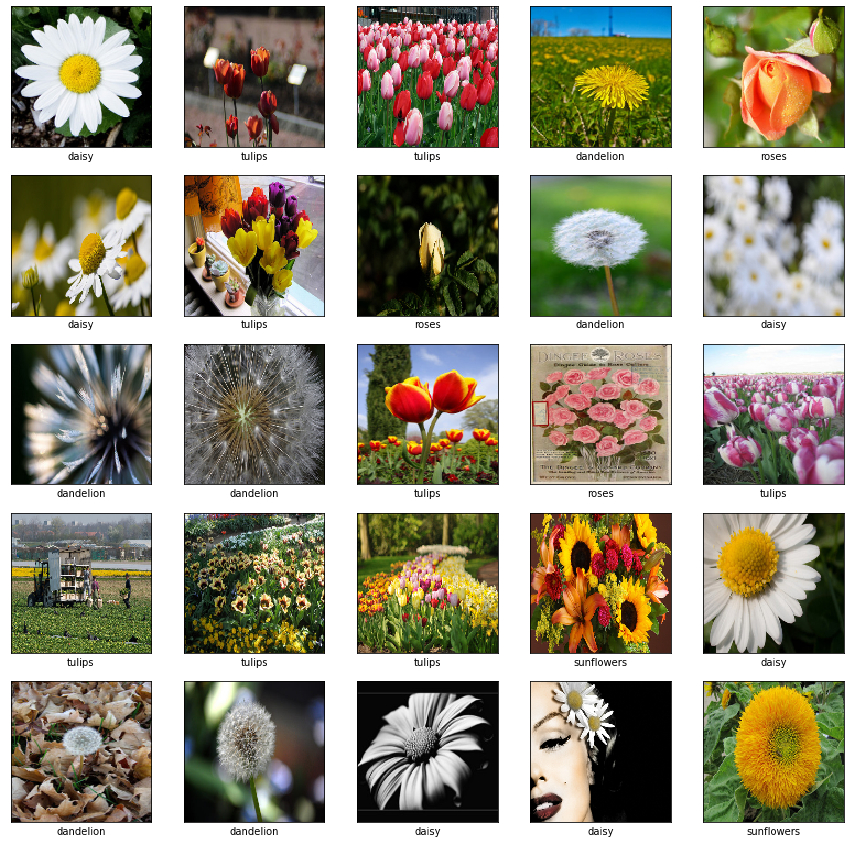

In [11]:
plt.figure(figsize=(15,15))
for i in range(25):
    image_path = np.random.choice(image_paths)
    image = plt.imread(image_path)
    image = cv2.resize(image, (128, 128))
    label = image_path.split("/")[5]
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(image)
    plt.xlabel(label)
plt.show()

We are going to split the images in a 85:15 ratio (train:test). 

In [0]:
# going for a 0.15 test split
nb_test_images = int(len(list(paths.list_images(flowers))) * 0.15)
nb_train_images = len(list(paths.list_images(flowers))) - nb_test_images

In [0]:
# specify the directory paths
train_dir = "train"
test_dir = "test"

In [0]:
def move_images(nb_images, output_dir):
    # iterate through the number of images
    for i in tqdm(range(nb_images)):
        # grab an image path and grab the label of the image
        image_path = image_paths[i]
        label = image_path.split("/")[5]
        
        # check if a directory for the label exists, if not create it
        new_image_dir = os.path.join(output_dir, label)
        if not os.path.exists(new_image_dir):
            os.makedirs(new_image_dir)
            
        # copy the current image to the respective folder
        shutil.copy2(image_path, new_image_dir)
    

In [15]:
# prepare the train and test set
move_images(nb_train_images, train_dir)
move_images(nb_test_images, test_dir)

100%|██████████| 550/550 [00:00<00:00, 4139.96it/s]


The final structure of the dataset looks like the following:

In [0]:
# in case the system does not have `tree` installed
# !sudo apt-get install tree

In [17]:
!tree --dirsfirst --filelimit 10 train

train
├── daisy [617 entries exceeds filelimit, not opening dir]
├── dandelion [877 entries exceeds filelimit, not opening dir]
├── roses [626 entries exceeds filelimit, not opening dir]
├── sunflowers [680 entries exceeds filelimit, not opening dir]
└── tulips [785 entries exceeds filelimit, not opening dir]

5 directories, 0 files


In [18]:
!tree --dirsfirst --filelimit 10 test

test
├── daisy [183 entries exceeds filelimit, not opening dir]
├── dandelion [254 entries exceeds filelimit, not opening dir]
├── roses [186 entries exceeds filelimit, not opening dir]
├── sunflowers [182 entries exceeds filelimit, not opening dir]
└── tulips [212 entries exceeds filelimit, not opening dir]

5 directories, 0 files


We have an even distribution of the classes in both the sets. 